Sources: https://medium.com/@lahiru.19/a-guide-to-image-processing-from-scratch-7a6a413fb682#:~:text=However%2C%20in%20this%20article%2C%20we%E2%80%99ll%20explore%20image%20processing,to%20grayscale%2C%20resizing%2C%20and%20computing%20differences%20between%20images

In [3]:
import matplotlib.pyplot as plt
import numpy as np

img_org = plt.imread('img/car.jpg')

# Grayscale

Now I will convert the picture to Grayscale using different aproaches:
 - Lightness
 - Average
 - Luminosity
 

https://www.baeldung.com/cs/convert-rgb-to-grayscale

In [4]:
def grayscale_luminance(img):
    height = len(img)
    width = len(img[0])  # Changed from img[1] to img[0]
    
    # For grayscale, we only need a 2D array, not 3D
    img_gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = img[i][j]
            # Calculate luminance and convert to integer
            img_gray[i][j] = int(0.299*r + 0.587*g + 0.114*b)
    
    return img_gray


In [23]:
def grayscale_lightness(img):
    height = len(img)
    width = len(img[0])

    img = img.astype(float)
    img_gray = np.zeros((height, width), dtype=np.float16)

    for i in range(height):
        for j in range(width):
            r, g, b = img[i][j]
            img_gray[i][j] = (min(r,g,b) + max(r,g,b))/2
            

    img_gray = np.clip(img_gray, 0, 255).astype(np.uint8)
    return img_gray

In [26]:
def grayscale_average(img):
    height = len(img)
    width = len(img[0])
    
    img = img.astype(float)
    img_gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = img[i][j]
            img_gray[i,j] = int((r + g + b) / 3)

    return img_gray

In [16]:
def plot_images(imgs, titles):
    num_images = len(imgs)
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    # Create a figure with subplots
    fig, axs = plt.subplots(rows, cols, figsize=(8, 8))
    
    # Handle case where there's only one image (axs becomes a single Axes object)
    if num_images == 1:
        axs = np.array([axs])  # Wrap in array to keep indexing consistent
    
    # Flatten axs array for easier 1D indexing if it's 2D
    axs = axs.flatten()
    
    for i in range(num_images):
        # Ensure the image is in a valid format for imshow (e.g., float32, uint8)
        img = imgs[i]
        
        
        if  len(imgs[1].shape) == 2:
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(img)
        
        axs[i].set_title(titles[i])
        axs[i].axis('off')
        axs[i].grid(False)
    
    # Turn off unused subplots
    for j in range(num_images, len(axs)):
        axs[j].axis('off')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [27]:
img_lum = grayscale_luminance(img_org)
img_light = grayscale_lightness(img_org)
img_avg = grayscale_average(img_org)

imgs = [img_org, img_lum, img_light, img_avg]
titles = ['Original Image', 'Grayscale Luminosity', 'Grayscale Lightness', 'Grayscale Average']



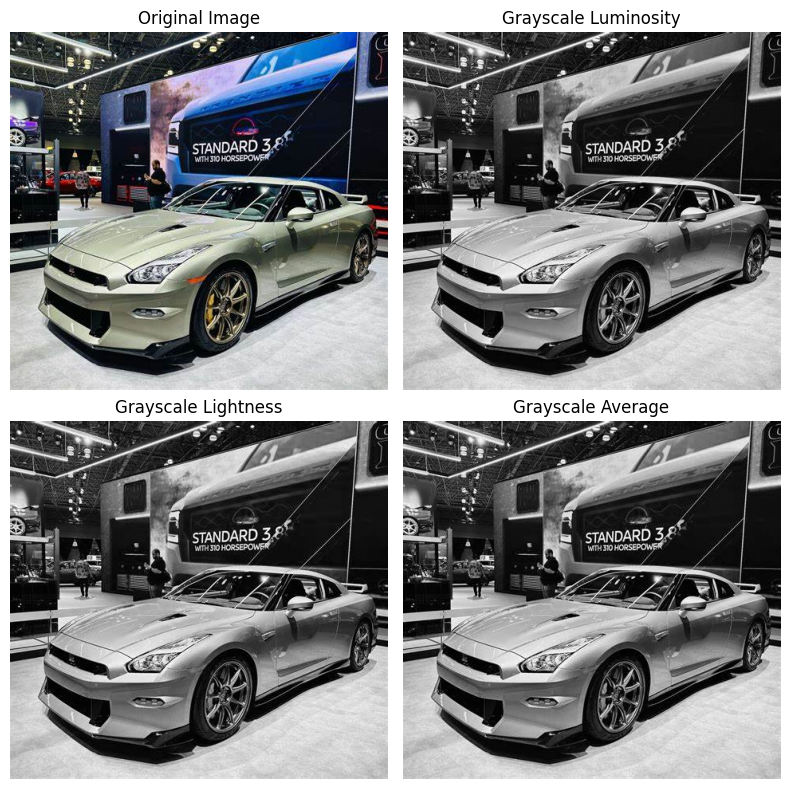

In [28]:
plot_images(imgs, titles)

# Jasność

Dodawanie macierzowe

In [11]:
((np.ones((2, 2, 3)) * 5)).shape

(2, 2, 3)

In [12]:
img_org

array([[[ 15,  19,  28],
        [ 13,  17,  26],
        [ 17,  21,  30],
        ...,
        [ 10,  11,  15],
        [  7,   8,  12],
        [  7,   8,  12]],

       [[ 23,  27,  36],
        [ 26,  31,  37],
        [ 32,  36,  45],
        ...,
        [ 11,  12,  16],
        [  9,  10,  14],
        [  9,  10,  14]],

       [[ 24,  29,  35],
        [ 31,  36,  40],
        [ 43,  48,  54],
        ...,
        [  3,   4,   9],
        [  0,   0,   5],
        [  0,   0,   5]],

       ...,

       [[203, 203, 201],
        [206, 206, 204],
        [203, 203, 201],
        ...,
        [191, 193, 190],
        [200, 202, 199],
        [200, 202, 199]],

       [[192, 192, 190],
        [199, 200, 195],
        [200, 200, 198],
        ...,
        [206, 208, 205],
        [198, 200, 197],
        [198, 200, 197]],

       [[192, 193, 188],
        [197, 198, 192],
        [199, 200, 195],
        ...,
        [204, 206, 203],
        [211, 213, 210],
        [201, 203, 200]]

In [68]:
def brightness(img, value):
    height = len(img)
    width = len(img[0])

    new = img + np.ones((height, width, 3)) * value
    new = new.astype(int)
    for k in range(3):
        for i in range(height):
            for j in range(width):
                new[i][j][k] = max(min(new[i][j][k], 254), 0)
    return new

In [69]:
def brightness_2(img, value):
    height = len(img)
    width = len(img[0])

    img = img.astype(float)
    img = img + value
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img
    

    

In [90]:
new_img = brightness(img_org, 100)

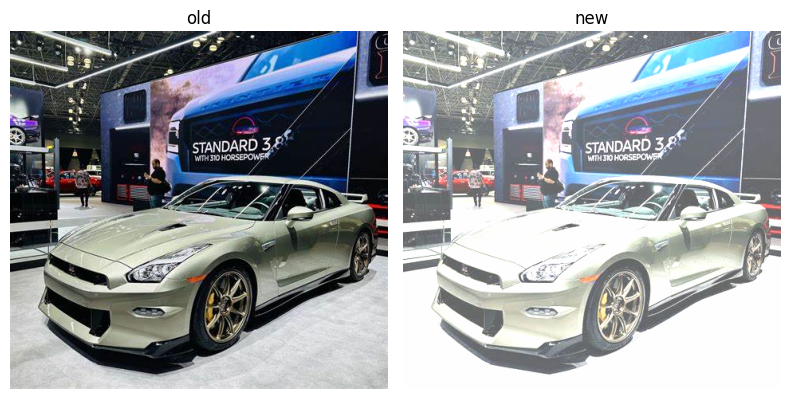

In [91]:
imgs = [img_org, new_img]
titles = ['old', 'new', 'new_better']
plot_images(imgs, titles)

# Contrast

In [ ]:
def contrast(img, param):

    height = len(img)
    width = len(img[0])
    
    factor = (259 * (param + 255)) / (255 * (259 - param))

    # Convert to float for calculations
    img = img.astype(np.float32)
    
    
    img = factor * (img - 128) + 128
    
    # Apply truncation and convert back to uint8
    img = np.clip(img, 0, 255).astype(np.uint8)


    return img
            

In [58]:
img_cont = contrast(img_org, 255)

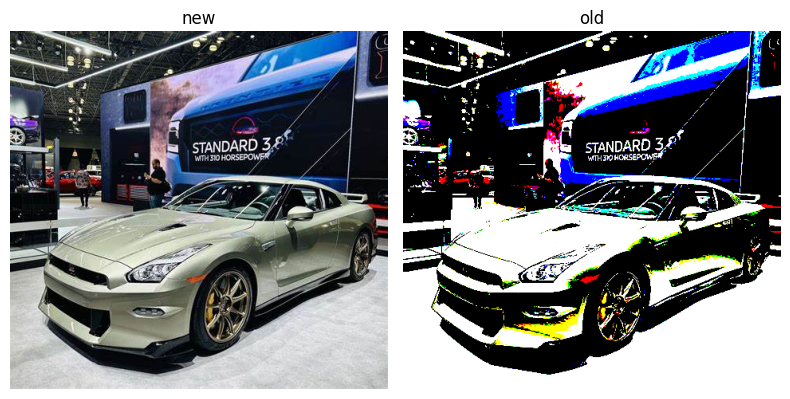

In [59]:
imgs = [img_org, img_cont]
titles = ['new', 'old']
plot_images(imgs, titles)

# Inverse negative

In [99]:
def inverse(img):
    img = img.astype(float)
    img = 255 - img 
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

In [100]:
img_inv = inverse(img_org)
titles = ['old', 'new']

In [101]:
imgs = [img_org, img_inv]


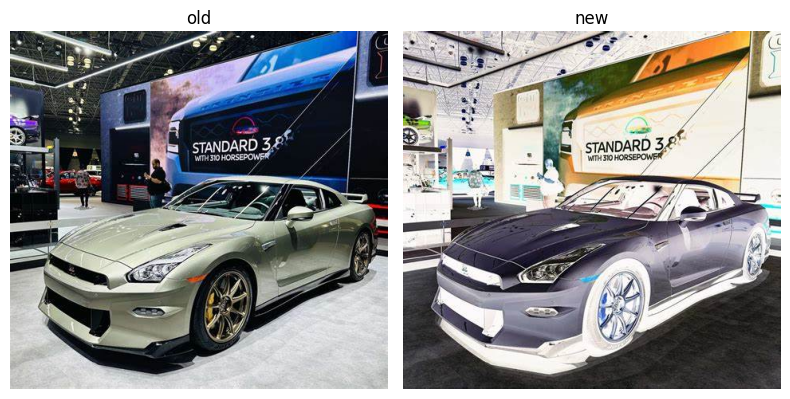

In [102]:
plot_images(imgs, titles)

In [116]:
img_neg = plt.imread('img/negative.gif')

In [117]:
neg_inv = inverse(img_neg)

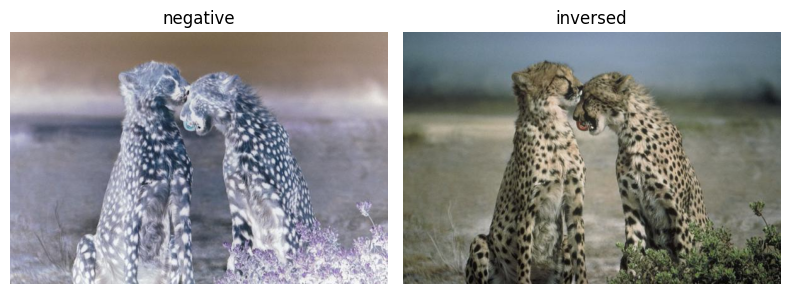

In [118]:
imgs = [img_neg, neg_inv]
titles = ['negative','inversed']
plot_images(imgs, titles)

# Binaryzacja

In [35]:
def binarize(img, thresh):
    gray = grayscale_luminance(img)

    bin = (gray > thresh).astype(np.uint8) * 255

    return bin
            

In [42]:
img_bin = binarize(img_org, 180)

In [38]:
imgs = [img_org, img_bin]
titles = ['old', 'new']

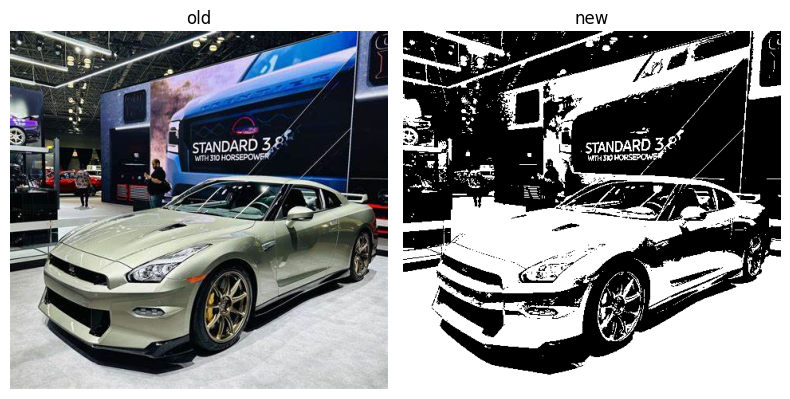

In [43]:
plot_images(imgs, titles)